In [95]:
import pandas as pd
import numpy as np
import string
from datetime import datetime
import unidecode
from word2number import w2n
import gensim

import warnings
warnings.filterwarnings("ignore")

In [96]:
data = pd.read_csv("data/cleaned-train-balanced-sarcasm-1.csv")

In [97]:
data

,label,comment,subreddit,score,ups,downs,created_utc,parent_comment,year,month,day,hour,cleaned comment,cleaned parent comment
0,0,NC and NH.,politics,2,-1,-1,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ...",2016,10,16,23,NC NH,yeah get argument prefer lived NC well
1,0,You do know west teams play against west teams...,nba,-4,-1,-1,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...,2016,11,1,0,know west teams play west teams east teams right,blazers mavericks wests seed even carry good e...
2,0,"They were underdogs earlier today, but since G...",nfl,3,3,0,2016-09-22 21:45:37,They're favored to win.,2016,9,22,21,underdogs earlier today since gronk announceme...,favored win
3,0,"This meme isn't funny none of the ""new york ni...",BlackPeopleTwitter,-8,-1,-1,2016-10-18 21:03:47,deadass don't kill my buzz,2016,10,18,21,meme funny none new york nigga ones,deadass kill buzz
4,0,I could use one of those tools.,MaddenUltimateTeam,6,-1,-1,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...,2016,12,30,17,could use tools,yep confirm saw tool use made boy easports MUT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992731,1,I'm sure that Iran and N. Korea have the techn...,reddit.com,2,2,0,2009-04-25 00:47:52,"No one is calling this an engineered pathogen,...",2009,4,25,0,sure iran korea technology create pig bird hum...,calling engineered pathogen reports virus bits...
992732,1,"whatever you do, don't vote green!",climate,1,1,0,2009-05-14 22:27:40,In a move typical of their recent do-nothing a...,2009,5,14,22,whatever vote green,move typical recent nothing approach CO emissi...
992733,1,Perhaps this is an atheist conspiracy to make ...,atheism,1,1,0,2009-01-11 00:22:57,Screw the Disabled--I've got to get to Church ...,2009,1,11,0,perhaps atheist conspiracy make christians loo...,screw disabled got get church time
992734,1,The Slavs got their own country - it is called...,worldnews,1,1,0,2009-01-23 21:12:49,I've always been unsettled by that. I hear a l...,2009,1,23,21,slavs got country called kosovo,always unsettled hear lot jewish people say is...


In [98]:
data= data.dropna()
data

,label,comment,subreddit,score,ups,downs,created_utc,parent_comment,year,month,day,hour,cleaned comment,cleaned parent comment
0,0,NC and NH.,politics,2,-1,-1,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ...",2016,10,16,23,NC NH,yeah get argument prefer lived NC well
1,0,You do know west teams play against west teams...,nba,-4,-1,-1,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...,2016,11,1,0,know west teams play west teams east teams right,blazers mavericks wests seed even carry good e...
2,0,"They were underdogs earlier today, but since G...",nfl,3,3,0,2016-09-22 21:45:37,They're favored to win.,2016,9,22,21,underdogs earlier today since gronk announceme...,favored win
3,0,"This meme isn't funny none of the ""new york ni...",BlackPeopleTwitter,-8,-1,-1,2016-10-18 21:03:47,deadass don't kill my buzz,2016,10,18,21,meme funny none new york nigga ones,deadass kill buzz
4,0,I could use one of those tools.,MaddenUltimateTeam,6,-1,-1,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...,2016,12,30,17,could use tools,yep confirm saw tool use made boy easports MUT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992731,1,I'm sure that Iran and N. Korea have the techn...,reddit.com,2,2,0,2009-04-25 00:47:52,"No one is calling this an engineered pathogen,...",2009,4,25,0,sure iran korea technology create pig bird hum...,calling engineered pathogen reports virus bits...
992732,1,"whatever you do, don't vote green!",climate,1,1,0,2009-05-14 22:27:40,In a move typical of their recent do-nothing a...,2009,5,14,22,whatever vote green,move typical recent nothing approach CO emissi...
992733,1,Perhaps this is an atheist conspiracy to make ...,atheism,1,1,0,2009-01-11 00:22:57,Screw the Disabled--I've got to get to Church ...,2009,1,11,0,perhaps atheist conspiracy make christians loo...,screw disabled got get church time
992734,1,The Slavs got their own country - it is called...,worldnews,1,1,0,2009-01-23 21:12:49,I've always been unsettled by that. I hear a l...,2009,1,23,21,slavs got country called kosovo,always unsettled hear lot jewish people say is...


In [99]:
data.dtypes

label                      int64
comment                   object
subreddit                 object
score                      int64
ups                        int64
downs                      int64
created_utc               object
parent_comment            object
year                       int64
month                      int64
day                        int64
hour                       int64
cleaned comment           object
cleaned parent comment    object
dtype: object

Top Frequency Word

In [103]:
words_dict = {}
for text in data["cleaned comment"]:
    #print(text)
    token_list = text.split()
    for token in token_list:
        if token in words_dict.keys():
            words_dict[token] += 1
        else :
            words_dict[token] = 1


In [101]:
words_dict = {}
for text in data["cleaned parent comment"]:
    #print(text)
    token_list = text.split()
    for token in token_list:
        if token in words_dict.keys():
            words_dict[token] += 1
        else :
            words_dict[token] = 1


In [104]:
sorted(words_dict.keys())

['AA',
 'AAA',
 'AAAA',
 'AAAAA',
 'AAAAAA',
 'AAAAAAA',
 'AAAAAAAAA',
 'AAAAAAAAAAAAAAAA',
 'AAAAAAAAAAAAAAAAAA',
 'AAAAAAAAAAAAAAAAAAA',
 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAA',
 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA',
 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA',
 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA',
 'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

In [94]:
string.printable


'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n\r\x0b\x0c'

In [7]:
sorted(words_dict, key=words_dict.get, reverse = True)

['like',
 'yeah',
 'people',
 'would',
 'get',
 'well',
 'know',
 'think',
 'good',
 'right',
 'sure',
 'really',
 'time',
 'yes',
 'make',
 'see',
 'game',
 'much',
 'could',
 'fuck',
 'never',
 'even',
 'better',
 'way',
 'need',
 'go',
 'man',
 'want',
 'oh',
 'got',
 'going',
 'still',
 'thing',
 'something',
 'say',
 'mean',
 'shit',
 'great',
 'use',
 'probably',
 'back',
 'actually',
 'someone',
 'also',
 'pretty',
 'bad',
 'obviously',
 'first',
 'everyone',
 'new',
 'every',
 'guy',
 'maybe',
 'thought',
 'take',
 'totally',
 'look',
 'forgot',
 'always',
 'us',
 'love',
 'work',
 'ever',
 'play',
 'though',
 'best',
 'let',
 'must',
 'thanks',
 'said',
 'real',
 'money',
 'makes',
 'anything',
 'white',
 'lol',
 'year',
 'made',
 'enough',
 'clearly',
 'looks',
 'guys',
 'fucking',
 'nice',
 'years',
 'wow',
 'getting',
 'day',
 'put',
 'give',
 'things',
 'god',
 'nothing',
 'world',
 'women',
 'team',
 'since',
 'least',
 'reddit',
 'guess',
 'post',
 'wrong',
 'life',
 'lo

In [8]:
data_s = data.loc[data["label"]==1, ]
data_ns = data.loc[data["label"]==0, ]

In [9]:
words_dict_s = {}
for text in data_s["cleaned comment"]:
    #print(text)
    token_list = text.split()
    for token in token_list:
        if token in words_dict_s.keys():
            words_dict_s[token] += 1
        else :
            words_dict_s[token] = 1


In [10]:
words_dict_s_keys = sorted(words_dict_s, key=words_dict_s.get, reverse = True)

In [11]:
words_dict_ns = {}
for text in data_ns["cleaned comment"]:
    #print(text)
    token_list = text.split()
    for token in token_list:
        if token in words_dict_ns.keys():
            words_dict_ns[token] += 1
        else :
            words_dict_ns[token] = 1


In [12]:
words_dict_ns_keys = sorted(words_dict_ns, key=words_dict_ns.get, reverse = True)

In [13]:
word_freq_s = {i: round(words_dict_s[i]/10) for i in words_dict_s_keys[0:30]}
word_freq_s

{'yeah': 3207,
 'like': 2576,
 'people': 2090,
 'well': 1782,
 'get': 1686,
 'would': 1592,
 'right': 1509,
 'know': 1429,
 'good': 1244,
 'sure': 1236,
 'yes': 1192,
 'think': 945,
 'make': 921,
 'oh': 919,
 'obviously': 901,
 'really': 896,
 'man': 892,
 'see': 880,
 'never': 845,
 'time': 836,
 'game': 824,
 'need': 813,
 'better': 797,
 'forgot': 792,
 'totally': 781,
 'way': 744,
 'much': 722,
 'could': 706,
 'want': 679,
 'everyone': 662}

In [14]:
#get the top 30 words and block the swaering
temp = words_dict_ns_keys[0:30]
words_dict_ns['fxxk'] = words_dict_ns[temp[8]] 
temp[8] = 'fxxk'

word_freq_ns = {i: round(words_dict_ns[i]/10) for i in temp}
word_freq_ns

{'like': 2938,
 'would': 1981,
 'get': 1726,
 'people': 1547,
 'think': 1528,
 'well': 1175,
 'good': 1162,
 'know': 1139,
 'fxxk': 1023,
 'really': 1023,
 'time': 1021,
 'yeah': 869,
 'even': 869,
 'still': 854,
 'see': 851,
 'could': 828,
 'make': 825,
 'much': 815,
 'right': 801,
 'game': 758,
 'got': 754,
 'go': 748,
 'want': 709,
 'also': 696,
 'sure': 696,
 'going': 686,
 'pretty': 685,
 'way': 678,
 'say': 668,
 'actually': 654}

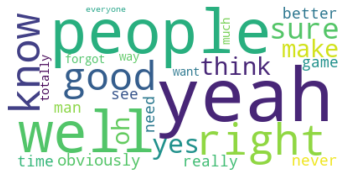

In [15]:
import os

from os import path
from wordcloud import WordCloud

# using word frequency list:
#word_freq = open("/tmp/word_freq.txt").read()
# say it looks like this:
word_freq = word_freq_s
text = " ".join([(k + " ")*v for k,v in word_freq.items()])
#text = data.loc[1000, "cleaned comment"]

# Generate a word cloud image
wordcloud = WordCloud(background_color='white', collocations=False).generate(text)


# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


plt.show()

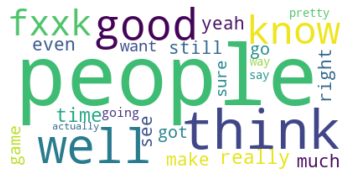

In [16]:
import os

from os import path
from wordcloud import WordCloud

# using word frequency list:
#word_freq = open("/tmp/word_freq.txt").read()
# say it looks like this:
word_freq = word_freq_ns
text = " ".join([(k + " ")*v for k,v in word_freq.items()])
#text = data.loc[1000, "cleaned comment"]

# Generate a word cloud image
wordcloud = WordCloud(background_color='white', collocations=False).generate(text)


# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


plt.show()

In [17]:
subreddit_count_no_label = data.astype({"label": "object"}).groupby(by = ["subreddit"]).count()["comment"]

In [18]:
subreddit_count = data.astype({"label": "object"}).groupby(by = ["subreddit", "label"]).count()["comment"]

In [19]:
subreddit_count

subreddit      label
07Scape        0        1
0x10c          1        2
0x3642         0        1
100DaysofKeto  0        3
100pushups     0        1
                       ..
zweiteliga     1        1
zyramains      0        2
               1        3
zyzz           0        2
               1        2
Name: comment, Length: 21584, dtype: int64

In [39]:
top11_subreddit = subreddit_count_no_label[subreddit_count_no_label>=13800].index

In [40]:
top11_subreddit

Index(['AskReddit', 'funny', 'leagueoflegends', 'nba', 'news', 'nfl',
       'pcmasterrace', 'pics', 'politics', 'todayilearned', 'worldnews'],
      dtype='object', name='subreddit')

In [41]:
top11_multiindex = subreddit_count.reset_index().set_index("subreddit").loc[list(top11_subreddit), ]

In [67]:
top11_final = top11_multiindex[top11_multiindex["label"]==1]

In [68]:
top11_final["Sarcastic"] = top11_final["comment"]

In [69]:
top11_final["Not Sarcastic"] = top11_multiindex[top11_multiindex["label"]==0]["comment"]

In [70]:
top11_final = top11_final[["Sarcastic", "Not Sarcastic"]]
top11_final

,Sarcastic,Not Sarcastic
subreddit,,
AskReddit,26021,38289
funny,8022,9576
leagueoflegends,11290,9383
nba,7355,6534
news,10181,6652
nfl,7139,6755
pcmasterrace,10595,7852
pics,7755,8134
politics,23772,15339


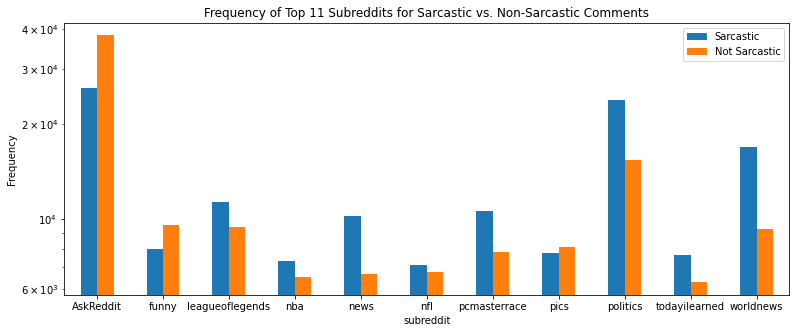

In [79]:
ax = top11_final.plot.bar(rot=0, figsize = (13,5), ylabel = "Frequency", logy = True, title = "Frequency of Top 11 Subreddits for Sarcastic vs. Non-Sarcastic Comments")

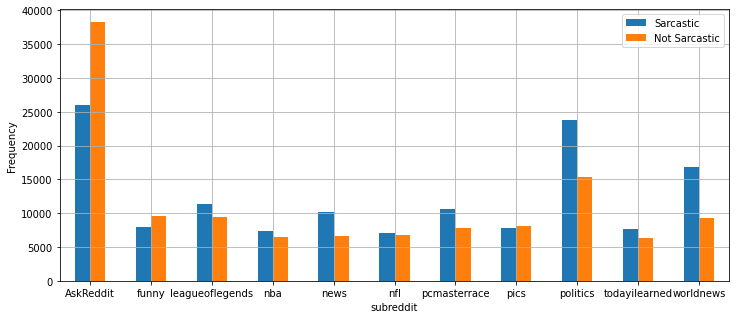

In [72]:
ax = top11_final.plot.bar(rot=0, figsize = (12,5), grid = True, ylabel = "Frequency")

In [51]:
comments_by_year = data.groupby('year')['label'].agg([np.sum,np.mean])
comments_by_year

,sum,mean
year,,
2009,1063,0.583745
2010,2951,0.567609
2011,6896,0.548913
2012,14460,0.537407
2013,33881,0.541161
2014,72798,0.537794
2015,147882,0.524691
2016,220465,0.472667


In [52]:
count_by_year = data.groupby('year')['label'].count()
count_by_year

year
2009      1821
2010      5199
2011     12563
2012     26907
2013     62608
2014    135364
2015    281846
2016    466428
Name: label, dtype: int64

Text(0.5, 1.0, 'Rate of Sarcasm on Reddit')

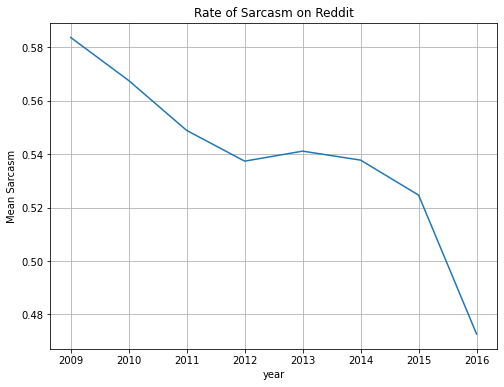

In [55]:
plt.figure(figsize=(8,6))
comments_by_year['mean'].plot(kind='line')
plt.ylabel('Mean Sarcasm')
plt.grid()
plt.title('Rate of Sarcasm on Reddit')

Text(0.5, 1.0, 'Frequency of Scores for Sarcastic vs. Non-Sarcastic Comments')

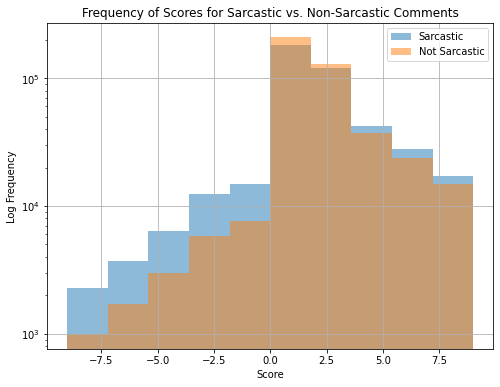

In [80]:
# Mean and STD of Score Rating
mean = data['score'].mean()
std = data['score'].std()

plt.figure(figsize=(8,6))
data[(data['score'].abs()<(10-((data['score'].abs()-mean)/std))) & (data['label']==1)]['score'].hist(alpha=0.5,label='Sarcastic')
data[(data['score'].abs()<(10-((data['score'].abs()-mean)/std))) & (data['label']==0)]['score'].hist(alpha=0.5,label='Not Sarcastic')
plt.yscale('log')
plt.ylabel('Log Frequency')
plt.xlabel('Score')
plt.legend()
plt.title('Frequency of Scores for Sarcastic vs. Non-Sarcastic Comments')

In [83]:
mean


6.919675522999065

In [84]:
std

48.55397472397914

Text(0.5, 1.0, 'Frequency of Scores for Sarcastic vs. Non-Sarcastic Comments')

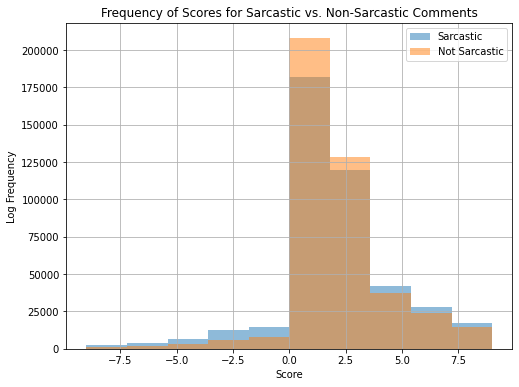

In [81]:
# Mean and STD of Score Rating
mean = data['score'].mean()
std = data['score'].std()

plt.figure(figsize=(8,6))
data[(data['score'].abs()<(10-((data['score'].abs()-mean)/std))) & (data['label']==1)]['score'].hist(alpha=0.5,label='Sarcastic')
data[(data['score'].abs()<(10-((data['score'].abs()-mean)/std))) & (data['label']==0)]['score'].hist(alpha=0.5,label='Not Sarcastic')
plt.ylabel('Log Frequency')
plt.xlabel('Score')
plt.legend()
plt.title('Frequency of Scores for Sarcastic vs. Non-Sarcastic Comments')